In [24]:
%config IPCompleter.greedy=True
%pylab inline

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

Populating the interactive namespace from numpy and matplotlib


# Music Genre Classification - Neural Network Training on CSV v2 file features

In [25]:
dataset_file = "datasets/dataV2.csv"

df = pd.read_csv(dataset_file, sep=",")
df.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,cont5,cont6,cont7,spectram_flatness,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,tonnetz6
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.380795,0.124698,1883.001208,1865.303842,3878.803772,0.101184,-162.754063,121.255273,-29.199931,54.109434,...,21.068699,25.304243,42.011566,0.001171,0.024199,0.022751,-0.000859,0.007904,0.000739,-0.000483
std,0.082699,0.062342,522.242739,339.144108,1096.400581,0.039370,95.151859,23.111192,20.168244,16.110998,...,3.139612,3.215191,5.889988,0.004498,0.088373,0.087442,0.057218,0.058348,0.016921,0.018316
min,0.171805,0.005014,549.065530,796.514455,710.220705,0.021877,-556.024780,42.361320,-99.755829,-3.247742,...,14.707758,18.454522,14.543139,0.000024,-0.280692,-0.279626,-0.269872,-0.213347,-0.083503,-0.080987
25%,0.321059,0.082679,1461.113254,1643.098517,3034.883732,0.071043,-213.648769,104.958897,-42.612360,45.396466,...,18.899340,22.919356,39.393112,0.000305,-0.027305,-0.028036,-0.033594,-0.025548,-0.007281,-0.010498
50%,0.385390,0.116670,1926.222388,1943.105990,4064.821254,0.097405,-138.674522,118.840340,-30.713336,54.597818,...,20.531552,24.822372,43.530784,0.000709,0.024605,0.019438,0.002340,0.009498,0.001412,-0.001173
75%,0.439446,0.167502,2277.180673,2110.350537,4748.075456,0.128231,-95.242519,135.433762,-17.951447,64.680765,...,22.887252,27.249788,46.144489,0.001278,0.072360,0.067379,0.034760,0.042833,0.010938,0.009652
max,0.667248,0.378549,3369.517356,2611.325445,6268.003765,0.257681,15.127309,197.522858,55.721581,98.046173,...,36.530988,39.303396,51.668599,0.108367,0.372279,0.409506,0.217829,0.243350,0.062162,0.075182


#### Project questions

**Q.8 What are the features types (numeric/textual/visual)?**

The dataset doesn't contain any null/nan values and every feature is quantitive continuous (except filename and label which are strings).

In [3]:
from sklearn import preprocessing

X = df.drop(["label", "filename"], axis=1).values

std_scale = preprocessing.StandardScaler().fit(X) # applying feature scaling because PCA uses euclidean distance to ocompute clusters

X = std_scale.transform(X)

y = df["label"].values

### Traininig a simple Neural network

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
encoder.fit(y)

y_encoded = encoder.transform(y)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y_encoded)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Input(shape=X.shape[1:]),
    Dense(600, activation="relu"),
    Dense(300, activation="relu"),
    Dense(100, activation="relu"),
    Dense(50, activation="tanh"),
    Dense(10, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy", # because classes are exclusive or else we would use  categorical_crossentropy
             optimizer=SGD(learning_rate=0.002), # Stochastic Gradient Descent, will use backpropoagation (reverse mode autodiff + Gradient Descent
             metrics=["accuracy"],)

model.summary()


# callback for early stopiing (add in the model callbacks array)
early_stopping_cb = EarlyStopping(patience=100,  # interupus training early if no progress
                                restore_best_weights=True) # keeps track of best weights to restore them at the end of training


#history = model.fit(X_train, y_train, epochs=500, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])
history = model.fit(X_train, y_train, epochs=600, validation_data=(X_valid, y_valid))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 600)               39000     
_________________________________________________________________
dense_75 (Dense)             (None, 300)               180300    
_________________________________________________________________
dense_76 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_77 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_78 (Dense)             (None, 10)                510       
Total params: 254,960
Trainable params: 254,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/600
18/18 [==============================] - 0s 7ms/step - loss: 2.3315 - accuracy: 0.0961 - val_loss: 2.

18/18 [==============================] - 0s 3ms/step - loss: 1.4800 - accuracy: 0.5783 - val_loss: 1.7219 - val_accuracy: 0.4255
Epoch 52/600
18/18 [==============================] - 0s 3ms/step - loss: 1.4693 - accuracy: 0.5854 - val_loss: 1.7149 - val_accuracy: 0.4415
Epoch 53/600
18/18 [==============================] - 0s 3ms/step - loss: 1.4587 - accuracy: 0.5925 - val_loss: 1.7078 - val_accuracy: 0.4468
Epoch 54/600
18/18 [==============================] - 0s 3ms/step - loss: 1.4479 - accuracy: 0.5890 - val_loss: 1.7006 - val_accuracy: 0.4521
Epoch 55/600
18/18 [==============================] - 0s 3ms/step - loss: 1.4377 - accuracy: 0.5925 - val_loss: 1.6934 - val_accuracy: 0.4628
Epoch 56/600
18/18 [==============================] - 0s 3ms/step - loss: 1.4271 - accuracy: 0.6050 - val_loss: 1.6863 - val_accuracy: 0.4628
Epoch 57/600
18/18 [==============================] - 0s 3ms/step - loss: 1.4171 - accuracy: 0.6032 - val_loss: 1.6794 - val_accuracy: 0.4628
Epoch 58/600
18/18 

Epoch 109/600
18/18 [==============================] - 0s 3ms/step - loss: 0.9690 - accuracy: 0.7722 - val_loss: 1.4035 - val_accuracy: 0.5585
Epoch 110/600
18/18 [==============================] - 0s 3ms/step - loss: 0.9617 - accuracy: 0.7722 - val_loss: 1.3991 - val_accuracy: 0.5585
Epoch 111/600
18/18 [==============================] - 0s 3ms/step - loss: 0.9547 - accuracy: 0.7758 - val_loss: 1.3950 - val_accuracy: 0.5638
Epoch 112/600
18/18 [==============================] - 0s 3ms/step - loss: 0.9474 - accuracy: 0.7811 - val_loss: 1.3912 - val_accuracy: 0.5638
Epoch 113/600
18/18 [==============================] - 0s 3ms/step - loss: 0.9407 - accuracy: 0.7811 - val_loss: 1.3883 - val_accuracy: 0.5638
Epoch 114/600
18/18 [==============================] - 0s 3ms/step - loss: 0.9339 - accuracy: 0.7811 - val_loss: 1.3852 - val_accuracy: 0.5585
Epoch 115/600
18/18 [==============================] - 0s 3ms/step - loss: 0.9274 - accuracy: 0.7865 - val_loss: 1.3816 - val_accuracy: 0.5638

18/18 [==============================] - 0s 3ms/step - loss: 0.6388 - accuracy: 0.8701 - val_loss: 1.2482 - val_accuracy: 0.6117
Epoch 167/600
18/18 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.8701 - val_loss: 1.2465 - val_accuracy: 0.6170
Epoch 168/600
18/18 [==============================] - 0s 3ms/step - loss: 0.6298 - accuracy: 0.8772 - val_loss: 1.2448 - val_accuracy: 0.6170
Epoch 169/600
18/18 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.8772 - val_loss: 1.2436 - val_accuracy: 0.6117
Epoch 170/600
18/18 [==============================] - 0s 4ms/step - loss: 0.6207 - accuracy: 0.8772 - val_loss: 1.2430 - val_accuracy: 0.6117
Epoch 171/600
18/18 [==============================] - 0s 3ms/step - loss: 0.6160 - accuracy: 0.8754 - val_loss: 1.2401 - val_accuracy: 0.6170
Epoch 172/600
18/18 [==============================] - 0s 3ms/step - loss: 0.6112 - accuracy: 0.8790 - val_loss: 1.2382 - val_accuracy: 0.6170
Epoch 173/600

18/18 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.9413 - val_loss: 1.1800 - val_accuracy: 0.6277
Epoch 224/600
18/18 [==============================] - 0s 3ms/step - loss: 0.4237 - accuracy: 0.9448 - val_loss: 1.1787 - val_accuracy: 0.6277
Epoch 225/600
18/18 [==============================] - 0s 4ms/step - loss: 0.4209 - accuracy: 0.9395 - val_loss: 1.1784 - val_accuracy: 0.6277
Epoch 226/600
18/18 [==============================] - 0s 3ms/step - loss: 0.4177 - accuracy: 0.9431 - val_loss: 1.1773 - val_accuracy: 0.6277
Epoch 227/600
18/18 [==============================] - 0s 4ms/step - loss: 0.4155 - accuracy: 0.9448 - val_loss: 1.1759 - val_accuracy: 0.6277
Epoch 228/600
18/18 [==============================] - 0s 4ms/step - loss: 0.4124 - accuracy: 0.9431 - val_loss: 1.1748 - val_accuracy: 0.6223
Epoch 229/600
18/18 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.9413 - val_loss: 1.1730 - val_accuracy: 0.6223
Epoch 230/600

18/18 [==============================] - 0s 3ms/step - loss: 0.2943 - accuracy: 0.9626 - val_loss: 1.1526 - val_accuracy: 0.6330
Epoch 281/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2924 - accuracy: 0.9626 - val_loss: 1.1521 - val_accuracy: 0.6330
Epoch 282/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2906 - accuracy: 0.9626 - val_loss: 1.1522 - val_accuracy: 0.6330
Epoch 283/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2886 - accuracy: 0.9626 - val_loss: 1.1526 - val_accuracy: 0.6330
Epoch 284/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2868 - accuracy: 0.9626 - val_loss: 1.1514 - val_accuracy: 0.6330
Epoch 285/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2851 - accuracy: 0.9644 - val_loss: 1.1498 - val_accuracy: 0.6330
Epoch 286/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2834 - accuracy: 0.9662 - val_loss: 1.1504 - val_accuracy: 0.6330
Epoch 287/600

18/18 [==============================] - 0s 3ms/step - loss: 0.2096 - accuracy: 0.9769 - val_loss: 1.1458 - val_accuracy: 0.6489
Epoch 338/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2086 - accuracy: 0.9804 - val_loss: 1.1450 - val_accuracy: 0.6543
Epoch 339/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2076 - accuracy: 0.9786 - val_loss: 1.1443 - val_accuracy: 0.6543
Epoch 340/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9786 - val_loss: 1.1437 - val_accuracy: 0.6596
Epoch 341/600
18/18 [==============================] - 0s 4ms/step - loss: 0.2050 - accuracy: 0.9804 - val_loss: 1.1441 - val_accuracy: 0.6543
Epoch 342/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2038 - accuracy: 0.9822 - val_loss: 1.1453 - val_accuracy: 0.6489
Epoch 343/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.9804 - val_loss: 1.1447 - val_accuracy: 0.6489
Epoch 344/600

18/18 [==============================] - 0s 3ms/step - loss: 0.1545 - accuracy: 0.9858 - val_loss: 1.1492 - val_accuracy: 0.6543
Epoch 395/600
18/18 [==============================] - 0s 3ms/step - loss: 0.1538 - accuracy: 0.9858 - val_loss: 1.1494 - val_accuracy: 0.6543
Epoch 396/600
18/18 [==============================] - 0s 4ms/step - loss: 0.1531 - accuracy: 0.9858 - val_loss: 1.1483 - val_accuracy: 0.6543
Epoch 397/600
18/18 [==============================] - 0s 3ms/step - loss: 0.1522 - accuracy: 0.9858 - val_loss: 1.1490 - val_accuracy: 0.6543
Epoch 398/600
18/18 [==============================] - 0s 3ms/step - loss: 0.1514 - accuracy: 0.9858 - val_loss: 1.1486 - val_accuracy: 0.6543
Epoch 399/600
18/18 [==============================] - 0s 3ms/step - loss: 0.1506 - accuracy: 0.9875 - val_loss: 1.1473 - val_accuracy: 0.6543
Epoch 400/600
18/18 [==============================] - 0s 3ms/step - loss: 0.1499 - accuracy: 0.9858 - val_loss: 1.1481 - val_accuracy: 0.6543
Epoch 401/600

18/18 [==============================] - 0s 3ms/step - loss: 0.1171 - accuracy: 0.9911 - val_loss: 1.1580 - val_accuracy: 0.6596
Epoch 452/600
18/18 [==============================] - 0s 4ms/step - loss: 0.1166 - accuracy: 0.9911 - val_loss: 1.1571 - val_accuracy: 0.6596
Epoch 453/600
18/18 [==============================] - 0s 3ms/step - loss: 0.1160 - accuracy: 0.9911 - val_loss: 1.1571 - val_accuracy: 0.6596
Epoch 454/600
18/18 [==============================] - 0s 3ms/step - loss: 0.1156 - accuracy: 0.9911 - val_loss: 1.1571 - val_accuracy: 0.6596
Epoch 455/600
18/18 [==============================] - 0s 3ms/step - loss: 0.1150 - accuracy: 0.9911 - val_loss: 1.1560 - val_accuracy: 0.6596
Epoch 456/600
18/18 [==============================] - 0s 3ms/step - loss: 0.1144 - accuracy: 0.9911 - val_loss: 1.1566 - val_accuracy: 0.6596
Epoch 457/600
18/18 [==============================] - 0s 3ms/step - loss: 0.1138 - accuracy: 0.9911 - val_loss: 1.1563 - val_accuracy: 0.6596
Epoch 458/600

18/18 [==============================] - 0s 3ms/step - loss: 0.0910 - accuracy: 0.9947 - val_loss: 1.1647 - val_accuracy: 0.6649
Epoch 509/600
18/18 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.9964 - val_loss: 1.1645 - val_accuracy: 0.6649
Epoch 510/600
18/18 [==============================] - 0s 3ms/step - loss: 0.0903 - accuracy: 0.9964 - val_loss: 1.1648 - val_accuracy: 0.6649
Epoch 511/600
18/18 [==============================] - 0s 3ms/step - loss: 0.0900 - accuracy: 0.9947 - val_loss: 1.1639 - val_accuracy: 0.6649
Epoch 512/600
18/18 [==============================] - 0s 3ms/step - loss: 0.0896 - accuracy: 0.9964 - val_loss: 1.1641 - val_accuracy: 0.6649
Epoch 513/600
18/18 [==============================] - 0s 3ms/step - loss: 0.0892 - accuracy: 0.9964 - val_loss: 1.1645 - val_accuracy: 0.6649
Epoch 514/600
18/18 [==============================] - 0s 3ms/step - loss: 0.0888 - accuracy: 0.9964 - val_loss: 1.1648 - val_accuracy: 0.6649
Epoch 515/600

18/18 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.9964 - val_loss: 1.1745 - val_accuracy: 0.6543
Epoch 566/600
18/18 [==============================] - 0s 4ms/step - loss: 0.0726 - accuracy: 0.9964 - val_loss: 1.1751 - val_accuracy: 0.6596
Epoch 567/600
18/18 [==============================] - 0s 4ms/step - loss: 0.0721 - accuracy: 0.9982 - val_loss: 1.1756 - val_accuracy: 0.6596
Epoch 568/600
18/18 [==============================] - 0s 3ms/step - loss: 0.0720 - accuracy: 0.9982 - val_loss: 1.1751 - val_accuracy: 0.6596
Epoch 569/600
18/18 [==============================] - 0s 3ms/step - loss: 0.0716 - accuracy: 0.9982 - val_loss: 1.1755 - val_accuracy: 0.6596
Epoch 570/600
18/18 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9982 - val_loss: 1.1754 - val_accuracy: 0.6543
Epoch 571/600
18/18 [==============================] - 0s 3ms/step - loss: 0.0711 - accuracy: 0.9982 - val_loss: 1.1758 - val_accuracy: 0.6596
Epoch 572/600

8/8 [==============================] - 0s 1ms/step - loss: 1.0166 - accuracy: 0.7320


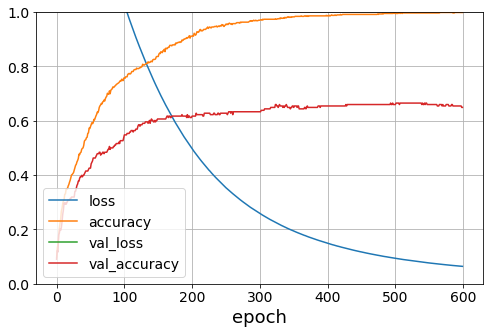

In [44]:
mse_test = model.evaluate(X_test, y_test)

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("epoch")
plt.show()

In [45]:
# model_path = "./models/musicgenre_nn_classifier_CSV-V2.h5"
# model.save(model_path)
# model = keras.models.load_model(model_path)
# model.predict(X)

8/8 [==============================] - 0s 1ms/step - loss: 1.0166 - accuracy: 0.7320
Class 0: blues
Class 1: classical
Class 2: country
Class 3: disco
Class 4: hiphop
Class 5: jazz
Class 6: metal
Class 7: pop
Class 8: reggae
Class 9: rock


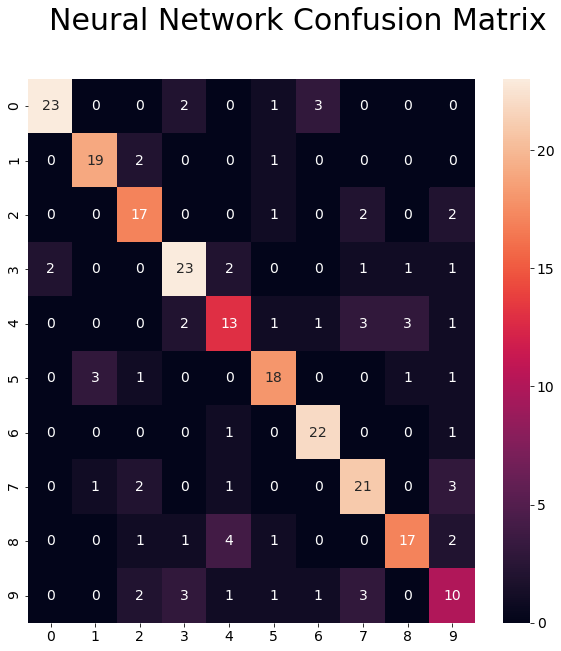

In [47]:
from sklearn.metrics import confusion_matrix
from ml_toolbox import show_confusion_matrix

y_pred_nn = np.argmax(model.predict(X_test), axis=-1)
model.evaluate(X_test, y_test)
show_confusion_matrix(y_test, y_pred_nn, encoder, "Neural Network Confusion Matrix")